# E2. Preprocesamiento de una Serie Temporal para Modelos de IA

En este Notebook se muestra el proceso completo de preprocesamiento de una serie temporal. Se abordan los pasos desde la carga de los datos en bruto, su limpieza, transformación y finalmente la normalización y escalado, dejando los datos listos para alimentar un modelo de inteligencia artificial.

## 1. Importación de Librerías y Carga de Datos

Utilizaremos el dataset clásico *AirPassengers*, que contiene el número de pasajeros mensuales, para ejemplificar el proceso. Este dataset presenta patrones estacionales y una tendencia creciente a lo largo del tiempo.

In [1]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 37.1 MB/s eta 0:00:0000:010:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar el dataset AirPassengers
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print('Vista previa de los datos:')
display(df.head(10))

Vista previa de los datos:


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


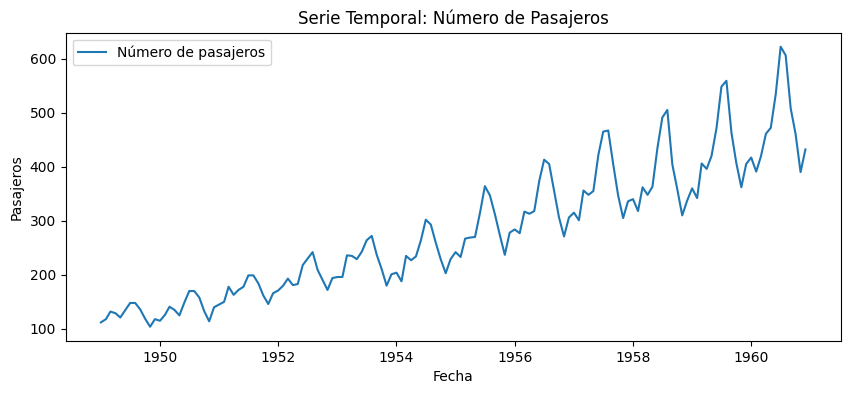

In [3]:
# Visualización de la serie temporal original
plt.figure(figsize=(10, 4))
plt.plot(df, label='Número de pasajeros')
plt.title('Serie Temporal: Número de Pasajeros')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

## 2. Limpieza y Exploración de Datos

Revisamos la existencia de valores faltantes y realizamos una limpieza básica de los datos.

In [4]:
nan_df = df.copy()
# Simular valores faltantes: eliminar aleatoriamente 10 filas\n",
np.random.seed(42)
missing_indices = np.random.choice(nan_df.index, size=10, replace=False)
nan_df.loc[missing_indices, 'Passengers'] = np.nan
display(nan_df.head(15))

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


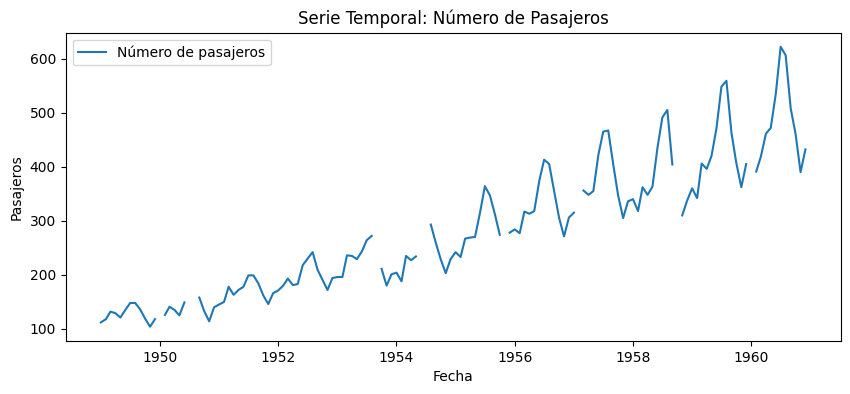

In [5]:
# Visualización de la serie temporal con datos faltantes
plt.figure(figsize=(10, 4))
plt.plot(nan_df, label='Número de pasajeros')
plt.title('Serie Temporal: Número de Pasajeros')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

In [6]:
# Verificar valores faltantes
print('Valores faltantes por columna:')
print(nan_df.isnull().sum())

# En este dataset no se esperan valores faltantes, pero en caso de haberlos se podrían imputar o eliminar

# Visualización rápida de estadísticas descriptivas
display(nan_df.describe())

Valores faltantes por columna:
Passengers    10
dtype: int64


,Passengers
count,134.000000
mean,282.022388
std,121.895892
min,104.000000
25%,180.250000
50%,268.000000
75%,362.000000
max,622.000000


In [7]:
restored_df = nan_df.interpolate(method='time')
print(restored_df.isnull().sum())

Passengers    0
dtype: int64


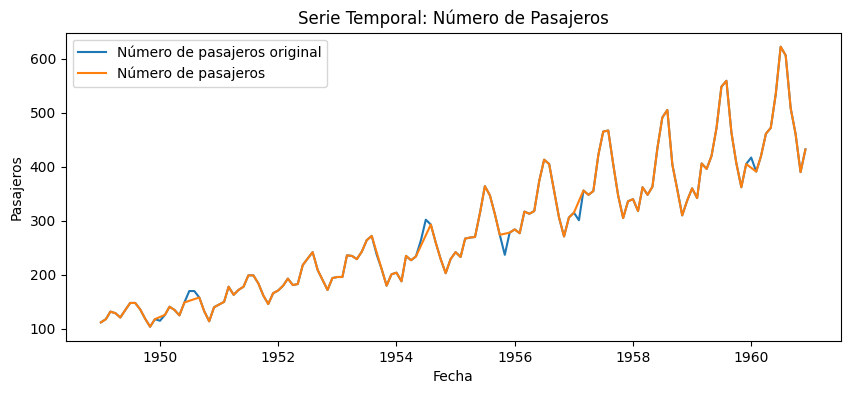

In [12]:
# Visualización de la serie temporal con datos restaurados
plt.figure(figsize=(10, 4))
plt.plot(df, label='Número de pasajeros original')
plt.plot(restored_df, label='Número de pasajeros')
plt.title('Serie Temporal: Número de Pasajeros')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

## 3. Transformación y Descomposición de la Serie Temporal

Para entender mejor la estructura de la serie, descompondremos la serie en sus componentes: tendencia, estacionalidad y residuo.

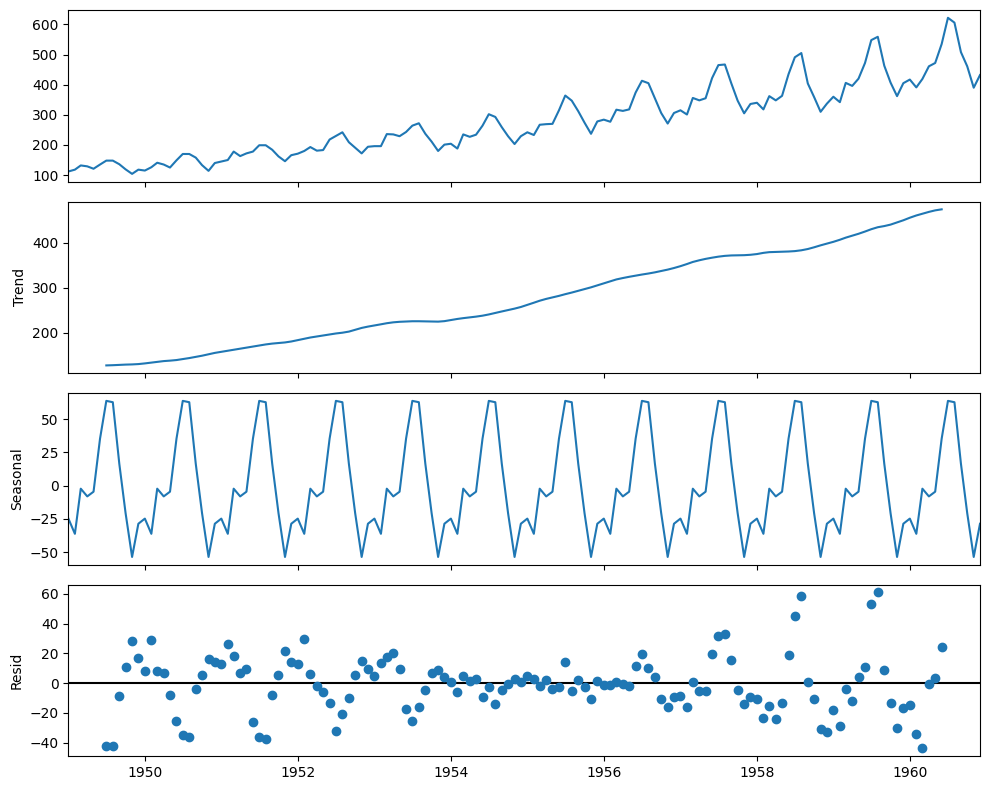

In [9]:
# Aplicar descomposición aditiva (útil cuando la variación es aproximadamente constante)
result = seasonal_decompose(df, model='additive', period=12)  

plt.rcParams.update({'figure.figsize': (10, 8)})
result.plot()
plt.show()

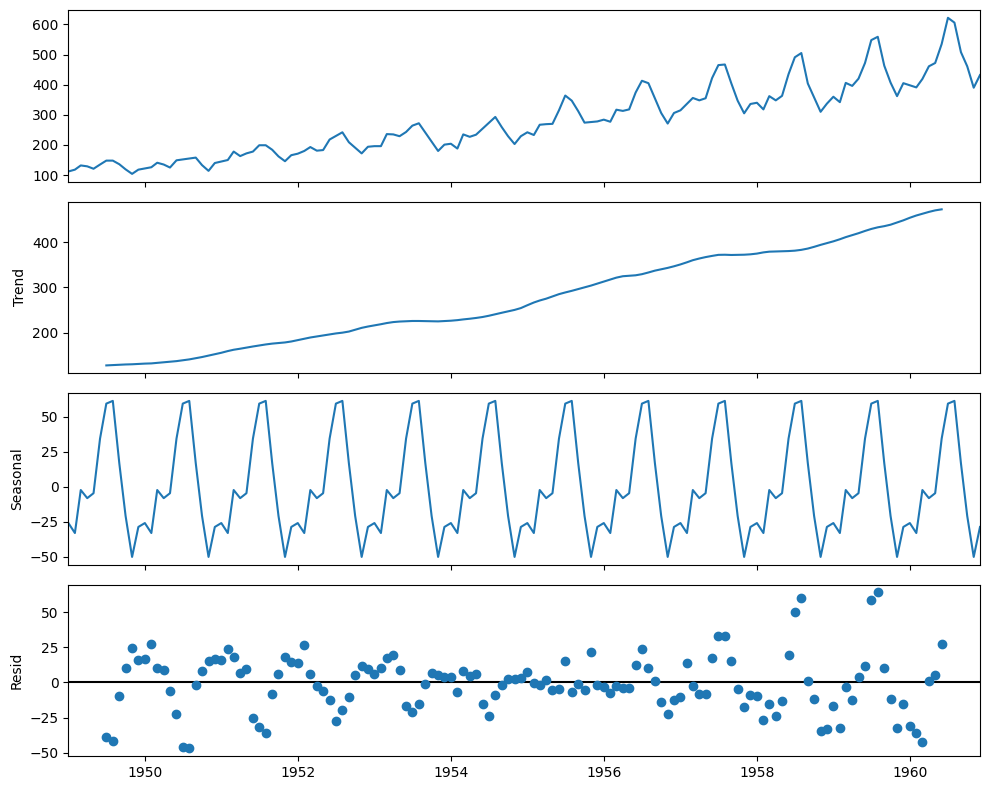

In [10]:
# Aplicar descomposición aditiva (útil cuando la variación es aproximadamente constante)
result = seasonal_decompose(restored_df, model='additive', period=12)  

plt.rcParams.update({'figure.figsize': (10, 8)})
result.plot()
plt.show()

## 4. Normalización y Escalado

Para preparar los datos para un modelo de IA, es importante normalizarlos y escalarlos. Aquí se muestran dos enfoques: 
- **Estandarización:** Utilizando el `StandardScaler` para centrar la media y escalar a una varianza unitaria.
- **Normalización:** Utilizando el `MinMaxScaler` para reescalar los valores en el rango [0, 1].

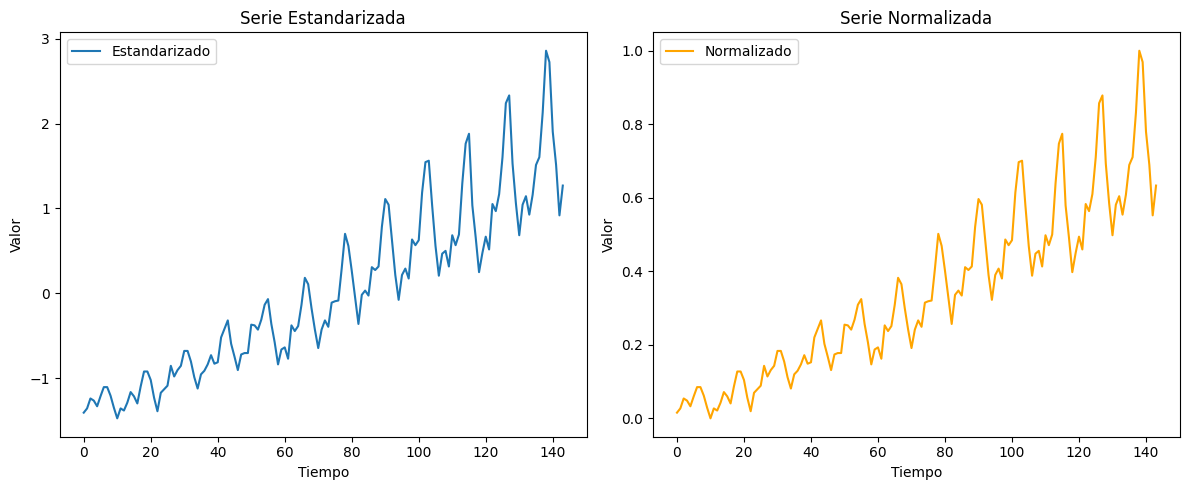

In [11]:
# Seleccionamos la columna a escalar
data = df.values  

# Opción 1: Estandarización
scaler_std = StandardScaler()
data_std = scaler_std.fit_transform(data)

# Opción 2: Normalización
scaler_mm = MinMaxScaler()
data_mm = scaler_mm.fit_transform(data)

# Visualización comparativa
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(data_std, label='Estandarizado')
plt.title('Serie Estandarizada')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(data_mm, label='Normalizado', color='orange')
plt.title('Serie Normalizada')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Conclusiones

En este Notebook se ha mostrado el flujo completo de preprocesamiento de una serie temporal:

- **Carga y exploración de datos:** Se cargó el dataset y se verificaron aspectos básicos de limpieza.
- **Descomposición:** Se separó la serie en tendencia, estacionalidad y residuo para entender su estructura.
- **Normalización y escalado:** Se aplicaron técnicas de estandarización y normalización para preparar los datos para su uso en modelos de IA.

Este proceso es fundamental para garantizar que los modelos de inteligencia artificial trabajen con datos de alta calidad y bien estructurados, mejorando así su desempeño y capacidad de detección de anomalías.